# Visualise samples as dependence of parameter values

Note: we should only train data which is in the state of equilibrium, i.e. now all rows would be useful.

Cehck with Bob: "equilibrium (typically about 5/mu generations)" -> would this be 5/1e-3 = 500000 for us?
10000

Keep these parameters for now:
N <- 1e3
mu <- 1e-5
m <- 5*1e-3
t_out <- seq(0, 5e4, l = 6)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
file_path = "../samples/samps_N1000_mu1e-05_m0.005.csv"
df = pd.read_csv(file_path)
t_values = [0, 10000, 20000, 30000, 40000, 50000]
num_rows = len(df)
df['t'] = [t_values[i % len(t_values)] for i in range(num_rows)]
df = df[['t'] + [col for col in df.columns if col != 't']]
df.head(10)

,t,N,mu,m,p1,p2,p3,p4,p5,p6,...,p1015,p1016,p1017,p1018,p1019,p1020,p1021,p1022,p1023,p1024
0,0,1000,0.00001,0.005,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,10000,1000,0.00001,0.005,0.012,0.016,0.015,0.101,0.079,0.002,...,0.018,0.008,0.022,0.005,0.045,0.009,0.040,0.004,0.001,0.052
2,20000,1000,0.00001,0.005,0.222,0.023,0.088,0.115,0.013,0.017,...,0.182,0.172,0.329,0.360,0.287,0.197,0.317,0.166,0.059,0.079
3,30000,1000,0.00001,0.005,0.274,0.035,0.257,0.329,0.099,0.159,...,0.061,0.059,0.002,0.000,0.019,0.031,0.250,0.073,0.200,0.132
4,40000,1000,0.00001,0.005,0.070,0.054,0.018,0.104,0.260,0.210,...,0.118,0.030,0.112,0.331,0.070,0.115,0.056,0.167,0.128,0.215
5,50000,1000,0.00001,0.005,0.342,0.234,0.167,0.146,0.219,0.188,...,0.273,0.517,0.663,0.454,0.418,0.458,0.366,0.307,0.147,0.210
6,0,1000,0.00001,0.005,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
7,10000,1000,0.00001,0.005,0.017,0.083,0.207,0.150,0.209,0.267,...,0.001,0.121,0.188,0.344,0.086,0.007,0.042,0.030,0.088,0.042
8,20000,1000,0.00001,0.005,0.165,0.102,0.016,0.010,0.018,0.255,...,0.078,0.111,0.088,0.121,0.188,0.156,0.212,0.081,0.122,0.230
9,30000,1000,0.00001,0.005,0.131,0.073,0.195,0.112,0.100,0.179,...,0.047,0.511,0.215,0.144,0.051,0.066,0.114,0.035,0.084,0.101


In [7]:
df.shape

(60000, 1028)

In [3]:
    

    # add time; TODO: this should come from the R script
    

,N,mu,m,p1,p2,p3,p4,p5,p6,p7,...,p1015,p1016,p1017,p1018,p1019,p1020,p1021,p1022,p1023,p1024
0,1000,0.00001,0.005,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,1000,0.00001,0.005,0.012,0.016,0.015,0.101,0.079,0.002,0.050,...,0.018,0.008,0.022,0.005,0.045,0.009,0.040,0.004,0.001,0.052
2,1000,0.00001,0.005,0.222,0.023,0.088,0.115,0.013,0.017,0.000,...,0.182,0.172,0.329,0.360,0.287,0.197,0.317,0.166,0.059,0.079
3,1000,0.00001,0.005,0.274,0.035,0.257,0.329,0.099,0.159,0.019,...,0.061,0.059,0.002,0.000,0.019,0.031,0.250,0.073,0.200,0.132
4,1000,0.00001,0.005,0.070,0.054,0.018,0.104,0.260,0.210,0.047,...,0.118,0.030,0.112,0.331,0.070,0.115,0.056,0.167,0.128,0.215


In [73]:
def plot_samples(file_path = "../samples/samps_N1000_mu1e-05_m0.005.csv", nrow=2, ncol=3):
    
    df = pd.read_csv(file_path)
    print("Data frame shape: ", df.shape)

    # add time; TODO: this should come from the R script
    t_values = [0, 10000, 20000, 30000, 40000, 50000]
    num_rows = len(df)
    df['t'] = [t_values[i % len(t_values)] for i in range(num_rows)]
    df = df[['t'] + [col for col in df.columns if col != 't']]

    # exatrct time steps where equilibrium is reached
    equilibrium_df = df.iloc[5::6, :]

    def plot_image_from_row(row, ax):
        N = row['N']
        mu = row['mu']
        m = row['m']
        t = row['t']
        image_data = row[['p'+str(i) for i in range(1, 1025)]].values.reshape(32, 32)
        
        ax.imshow(image_data)
        ax.set_title(f'N: {N}, mu: {mu}\nm: {m}, t: {t}', fontsize=8)
        ax.axis('off')

    fig, axes = plt.subplots(nrow, ncol, figsize=(9, 6))
    for i, ax in enumerate(axes.flat):
        if i < len(equilibrium_df):
            plot_image_from_row(equilibrium_df.iloc[i], ax)
        else:
            ax.axis('off')  

    plt.tight_layout()
    plt.show()


Data frame shape:  (60000, 1027)


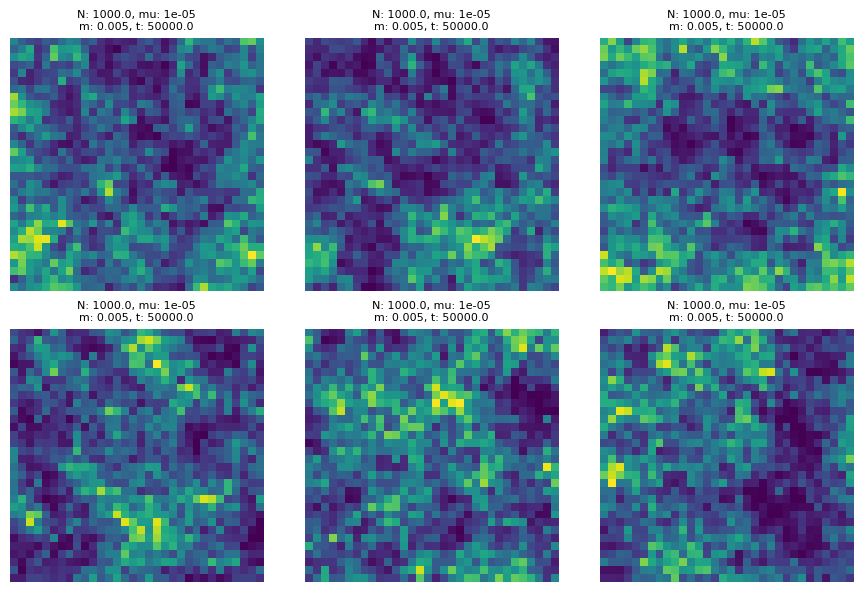

In [74]:
plot_samples(file_path = "../samples/samps_N1000_mu1e-05_m0.005.csv")


Data frame shape:  (12, 1027)


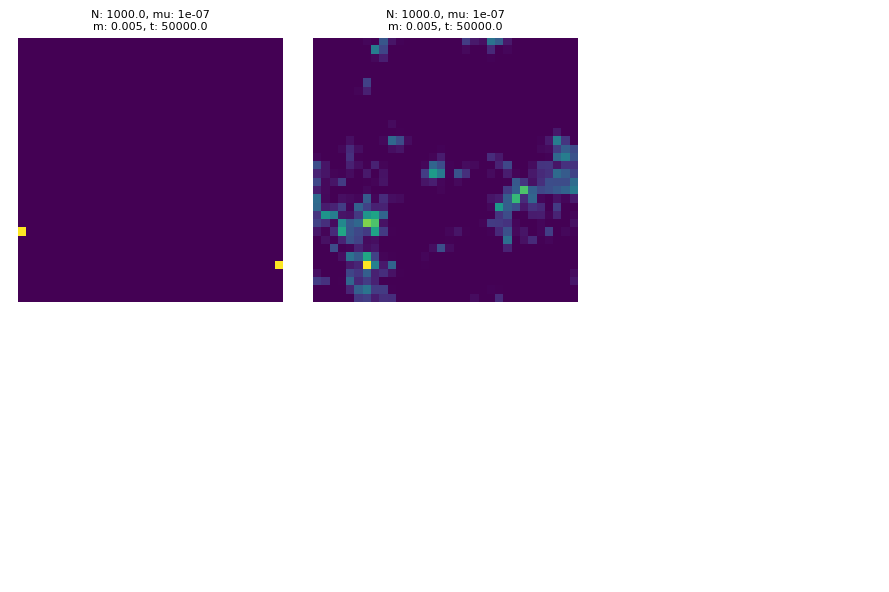

In [75]:
plot_samples(file_path = "../samples/samps_N1000_mu1e-07_m0.005.csv")